Found 31663 files belonging to 2 classes.
Found 3958 files belonging to 2 classes.
Found 3959 files belonging to 2 classes.
Epoch 1/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3622s 29s/step - accuracy: 0.5661 - loss: 0.7163 - precision: 0.5932 - recall: 0.4344 - val_accuracy: 0.6364 - val_loss: 0.6250 - val_precision: 0.7443 - val_recall: 0.4151
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3553s 29s/step - accuracy: 0.6640 - loss: 0.6014 - precision: 0.6545 - recall: 0.6976 - val_accuracy: 0.7036 - val_loss: 0.5580 - val_precision: 0.6483 - val_recall: 0.8898
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3543s 29s/step - accuracy: 0.7364 - loss: 0.5211 - precision: 0.7192 - recall: 0.7779 - val_accuracy: 0.7441 - val_loss: 0.5083 - val_precision: 0.7601 - val_recall: 0.7128
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 3417s 28s/step - accuracy: 0.7521 - loss: 0.4948 - precision: 0.7372 - recall: 0.7847 - val_accuracy: 0.7547 - val_loss: 0.4930 - val_precision: 0.7524 - val_recall: 0.7588
Epoch 5/30
124/124 ━━━━━

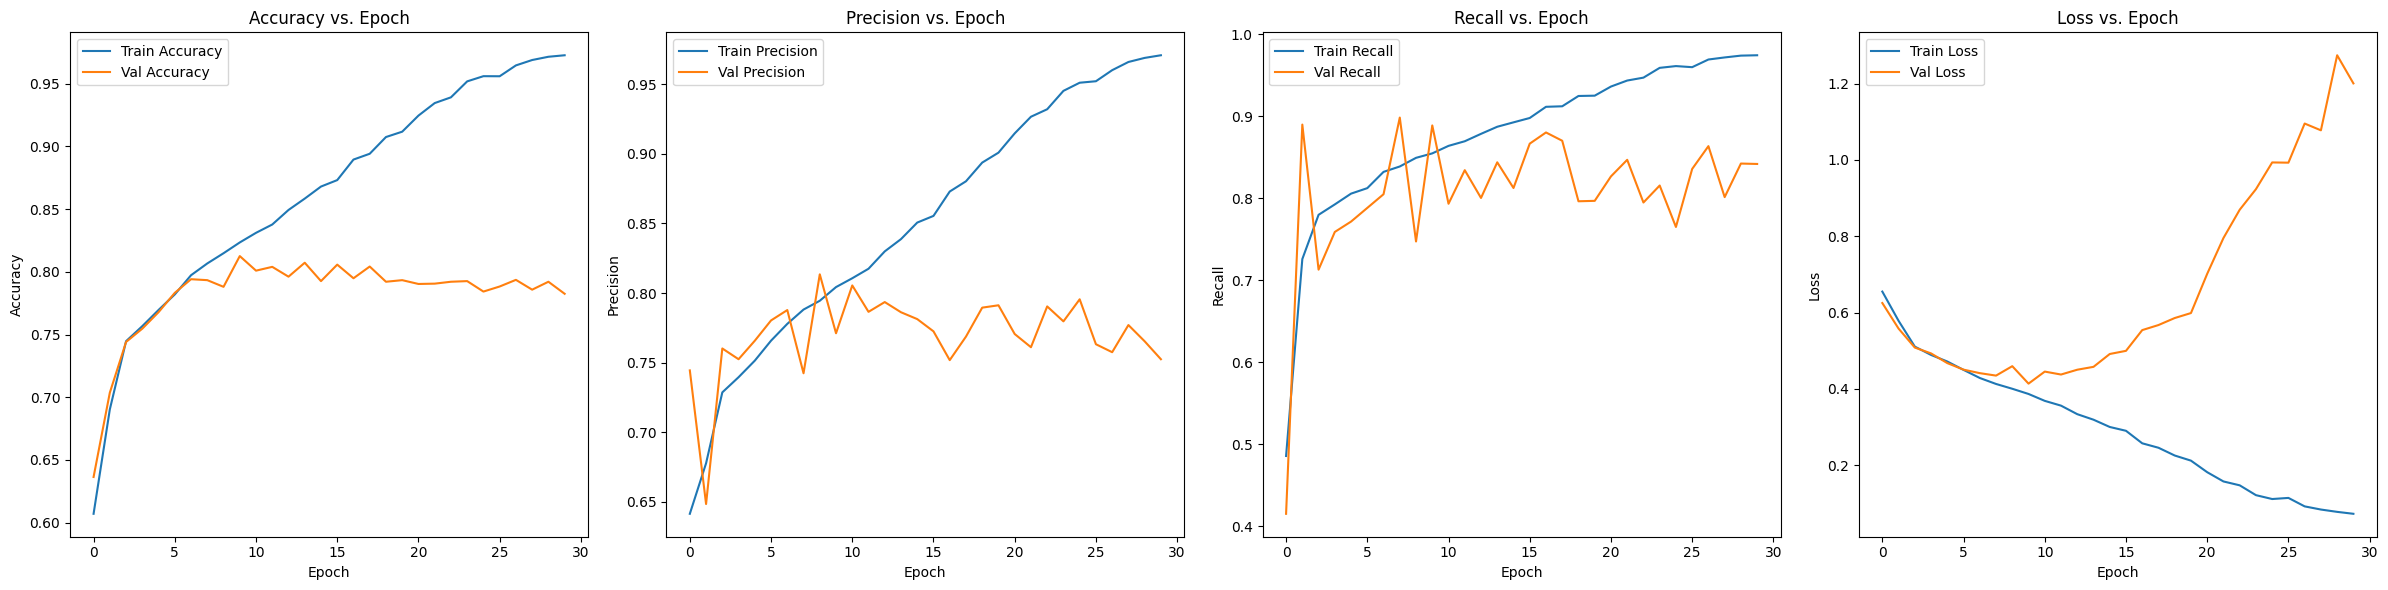

16/16 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.7831 - loss: 1.2595 - precision: 0.7509 - recall: 0.8355
Test Accuracy: 0.789
Test Precision: 0.763
Test Recall: 0.839
Test Loss: 1.192


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

train_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset_40k/train',
    image_size=(512, 512),
    batch_size=256,
    label_mode='binary'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset_40k/val',
    image_size=(512, 512),
    batch_size=256,
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset_40k/test',
    image_size=(512, 512),
    batch_size=256,
    label_mode='binary'
)

base_model = models.Sequential([
    layers.Input(shape=(512, 512, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

base_model.compile(
   optimizer = 'adam',

   loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)

history = base_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(24, 6))

# Accuracy
plt.subplot(1, 4, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Precision
plt.subplot(1, 4, 2)
plt.plot(epochs_range, precision, label='Train Precision')
plt.plot(epochs_range, val_precision, label='Val Precision')
plt.title('Precision vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(1, 4, 3)
plt.plot(epochs_range, recall, label='Train Recall')
plt.plot(epochs_range, val_recall, label='Val Recall')
plt.title('Recall vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Loss
plt.subplot(1, 4, 4)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = base_model.evaluate(test_ds)

# Print out the results
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test Loss: {test_loss:.3f}")